In [1]:
import django
import os
import json
os.environ['DJANGO_SETTINGS_MODULE'] = 'django_settings'
django.setup()

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import math

In [3]:
# 마지막 color filter 

In [4]:
from monde.models import *
from mondebro.models import *

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import math

In [6]:
Product.objects.last().categories

<ProductCategories: ProductCategories object (265)>

In [7]:
def get_data_result(category, instance):
    s_data = instance.shape_result
    ch_data = instance.charm_result
    co_data = instance.colors
    d_data = instance.deco_result
    p_data = instance.pattern_result
    if category == 'shape':
        return s_data, 10
    elif category == 'charm':
        return ch_data, 6
    elif category == 'color':
        return co_data, 8
    elif category == 'deco':
        return d_data, 5.7
    elif category == 'pattern':
        return p_data, 6.7
    return None

In [8]:
def pass_filter(value, count):
    result = value * math.sqrt(((count/10) + 1) * count)
    return result

In [9]:
def filter_type(user_input, queryset):
    types = user_input.pop('type')
    qs = queryset.filter(type_result__contains=types)
    return qs

In [10]:
def product_overlap_count(user_input, instance):
    count = 0
    value = 0
#     weight = 2 # shape = color > pattern > charm > deco 
    
    for category in user_input.keys():
        data, weight = get_data_result(category, instance)
        user_select = user_input[category]
        if user_select in data:
            count +=1
            value += data[user_select] * weight
            
    if count == 0:
        pass
    
    result = pass_filter(value, count)

    return instance, result

In [11]:
def filtered_data(instance, user_input, result_dict):
    i, result = product_overlap_count(user_input, instance)
    if result != 0:
        result_dict[i]=result
    else:
        pass
    return result_dict

In [30]:
def search(user_input):
    queryset = ProductCategories.objects.all()
    qs = filter_type(user_input, queryset)
    result_dict = {}
    for q in qs:
        result_dict = filtered_data(q, user_input, result_dict)
    print(result_dict)
    sorted_category_result_list = sorted(result_dict, key=lambda kv: result_dict[kv], reverse=True)
    sorted_product = list(map(lambda x: x.product, sorted_category_result_list))
    return sorted_product

In [31]:
user_input = {
    'type': 'cross_bag',
    'color': 'red',
    'shape': 'square',
    'charm':'tassel'
}

In [32]:
r= search(user_input)

{<ProductCategories: ProductCategories object (140)>: 10.488088481701517, <ProductCategories: ProductCategories object (141)>: 10.488088481701517, <ProductCategories: ProductCategories object (144)>: 27.885480092693403, <ProductCategories: ProductCategories object (145)>: 21.688706738761535, <ProductCategories: ProductCategories object (148)>: 10.488088481701517, <ProductCategories: ProductCategories object (151)>: 8.390470785361213, <ProductCategories: ProductCategories object (153)>: 47.3962023795156, <ProductCategories: ProductCategories object (166)>: 21.688706738761535, <ProductCategories: ProductCategories object (169)>: 10.488088481701517, <ProductCategories: ProductCategories object (170)>: 8.390470785361213, <ProductCategories: ProductCategories object (173)>: 27.885480092693403, <ProductCategories: ProductCategories object (174)>: 8.390470785361213, <ProductCategories: ProductCategories object (175)>: 10.488088481701517, <ProductCategories: ProductCategories object (177)>: 10

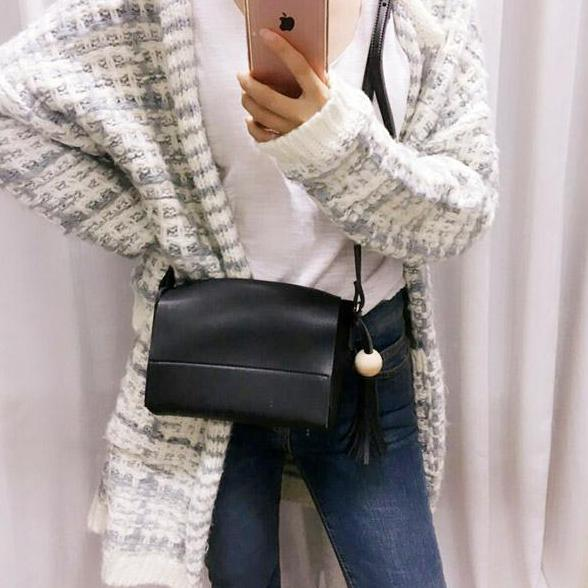

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=641964&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=Z2t3UFg%3D


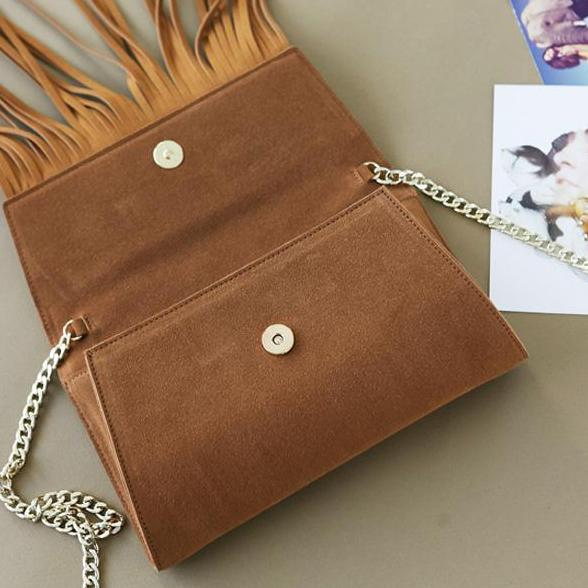

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=617511&xcode=006&mcode=000&scode=&type=P&sort=order&cur_code=006&GfDT=Z293U1k%3D


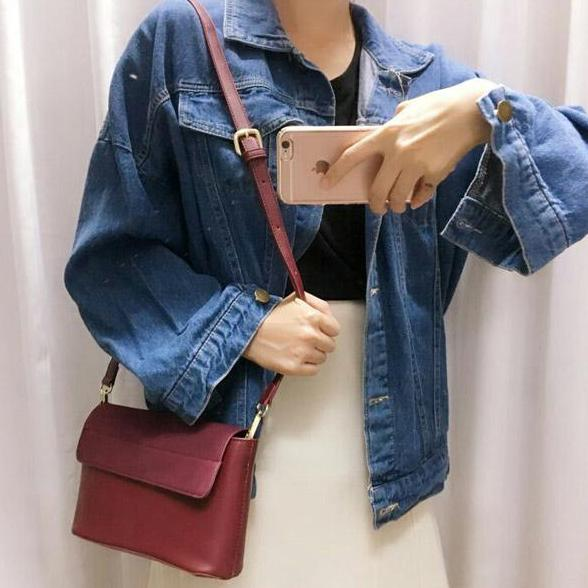

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=645613&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=bm57W11G


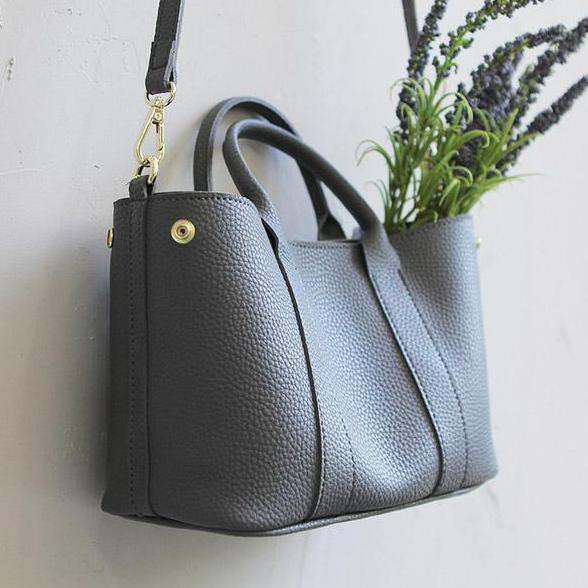

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=626056&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=bm56W1w%3D


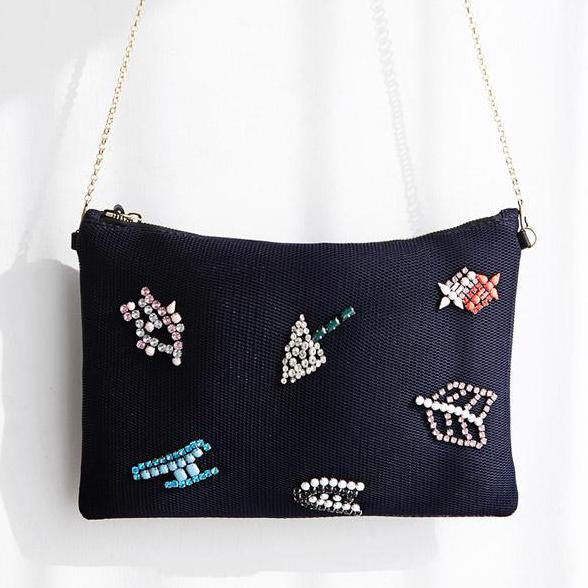

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=622812&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=bW53U1U%3D


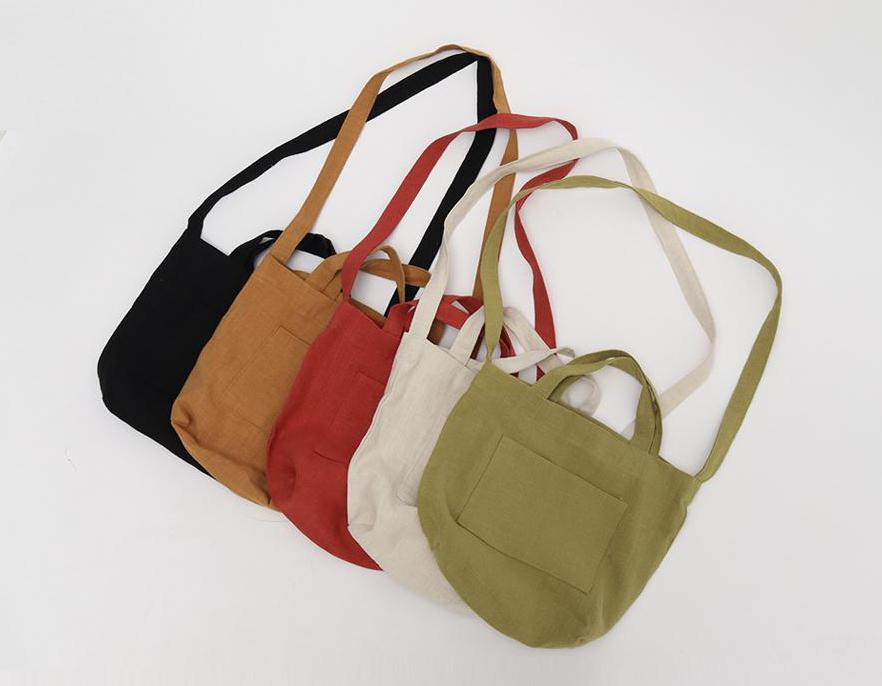

http://www.beginning.kr/shop/shopdetail.html?branduid=1115640&xcode=041&mcode=004&scode=&type=Y&sort=manual&cur_code=041&GfDT=bm11W11B


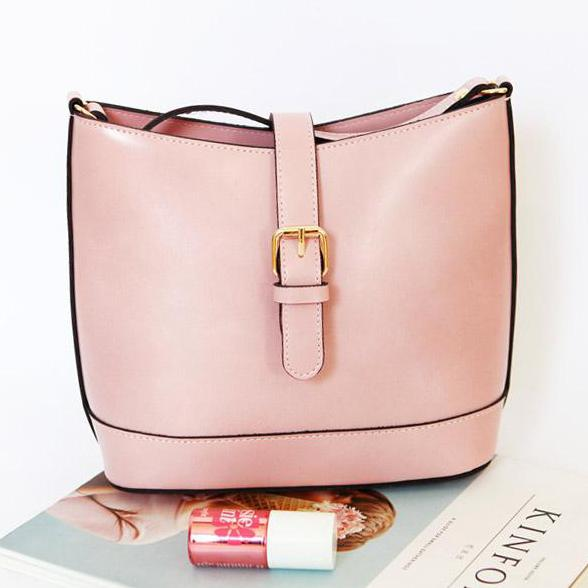

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=621685&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=Zmp3Vg%3D%3D


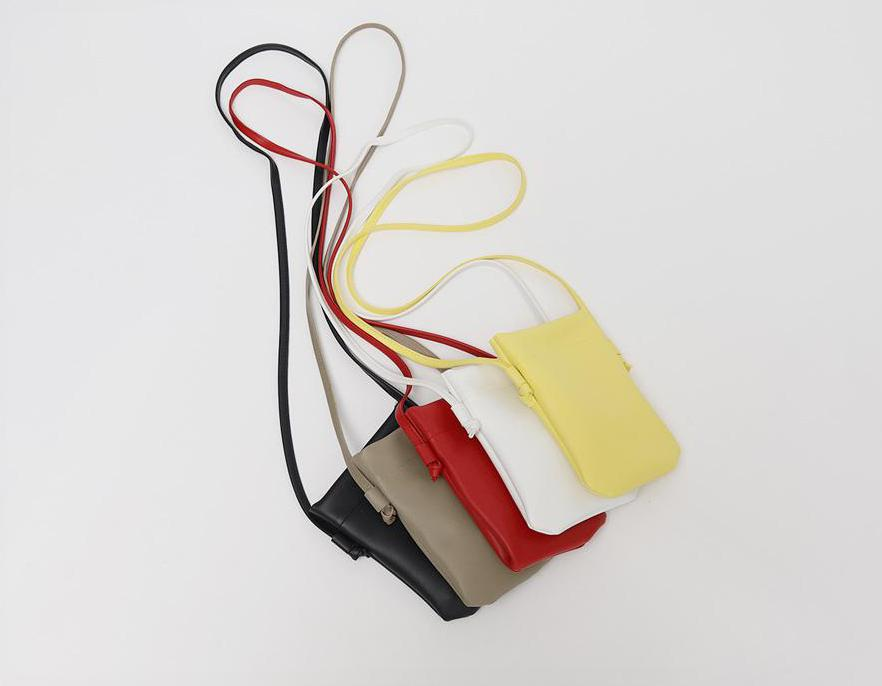

http://www.beginning.kr/shop/shopdetail.html?branduid=1116278&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=bmt%2BW1hF


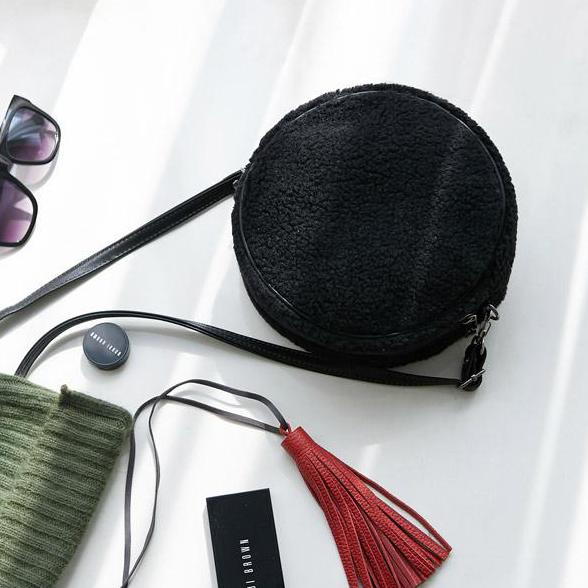

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=617238&xcode=006&mcode=000&scode=&type=P&sort=order&cur_code=006&GfDT=bm14W15C


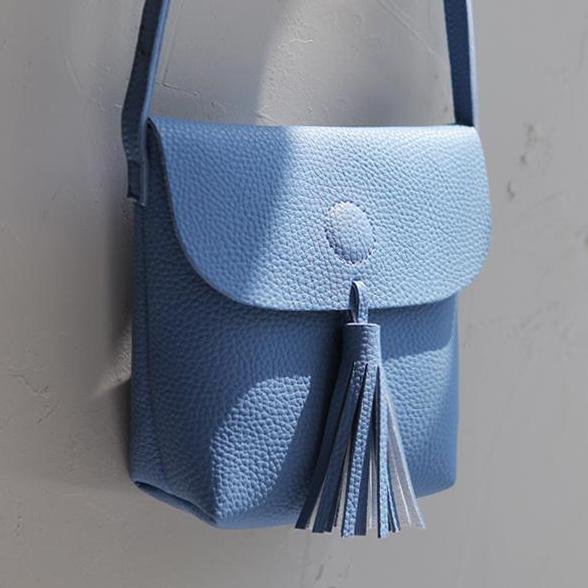

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=626151&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=bml3Ulw%3D


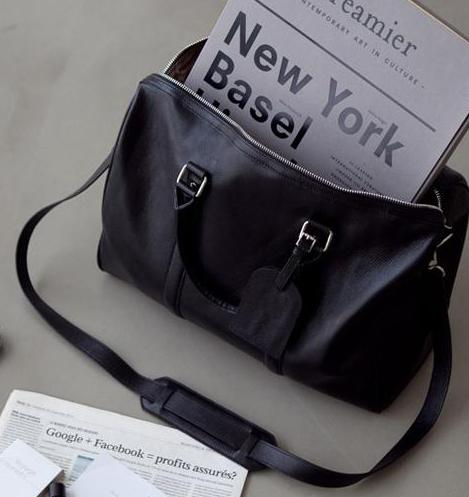

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=23271&xcode=006&mcode=000&scode=&type=P&sort=order&cur_code=006&GfDT=Zmh3WA%3D%3D


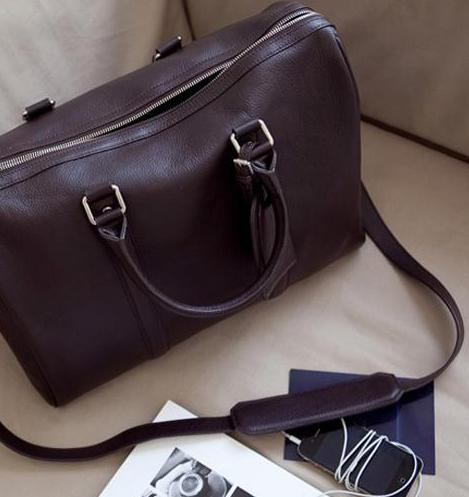

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=23270&xcode=006&mcode=000&scode=&type=P&sort=order&cur_code=006&GfDT=bm97W11F


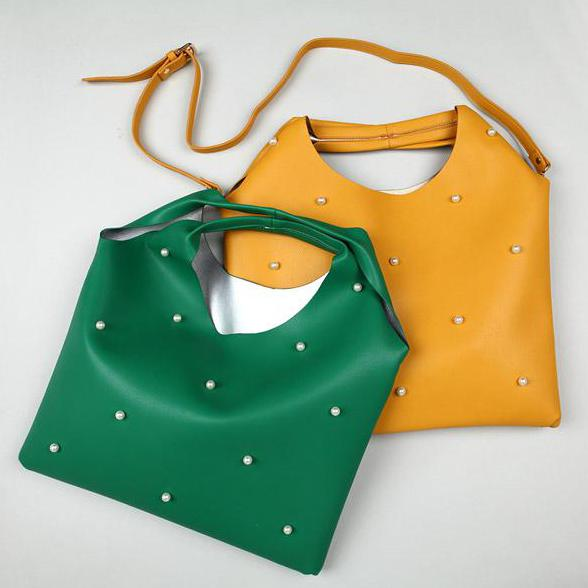

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=703831&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=bml1W18%3D


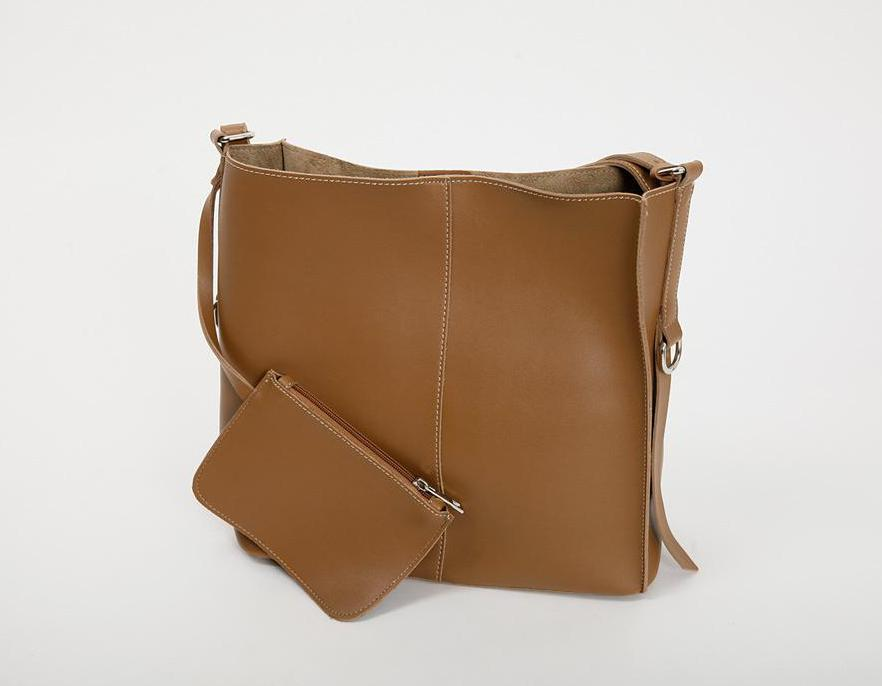

http://www.beginning.kr/shop/shopdetail.html?branduid=1106848&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=aGd3U1o%3D


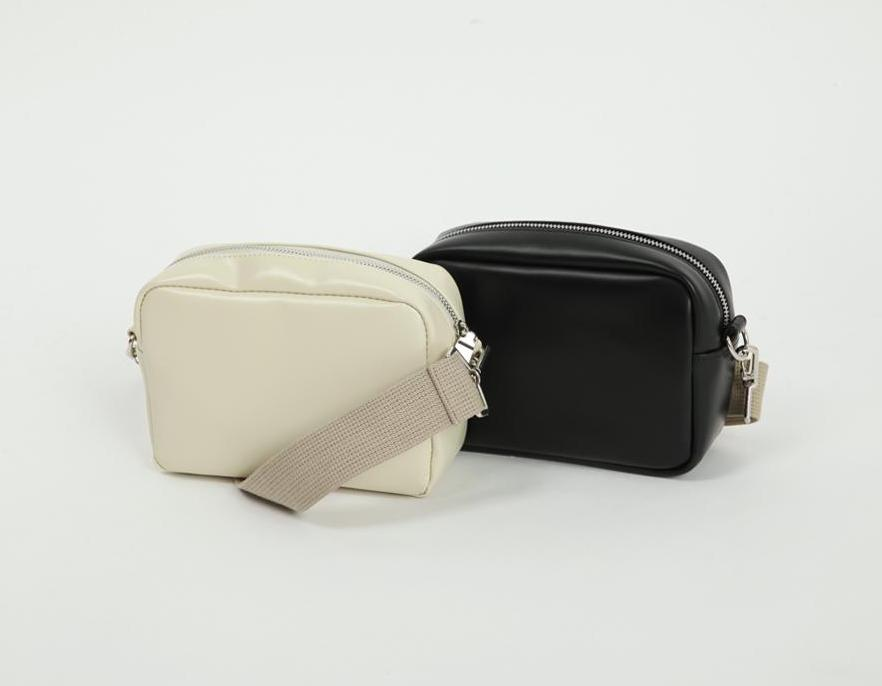

http://www.beginning.kr/shop/shopdetail.html?branduid=1111199&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=bm17W11H


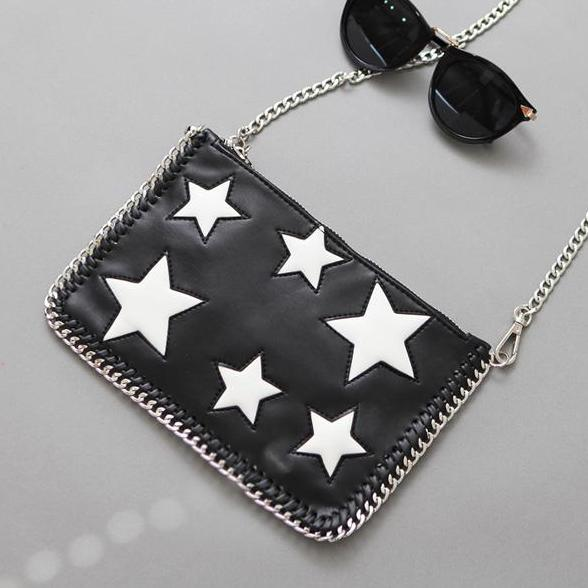

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=626042&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=aGZ3UA%3D%3D


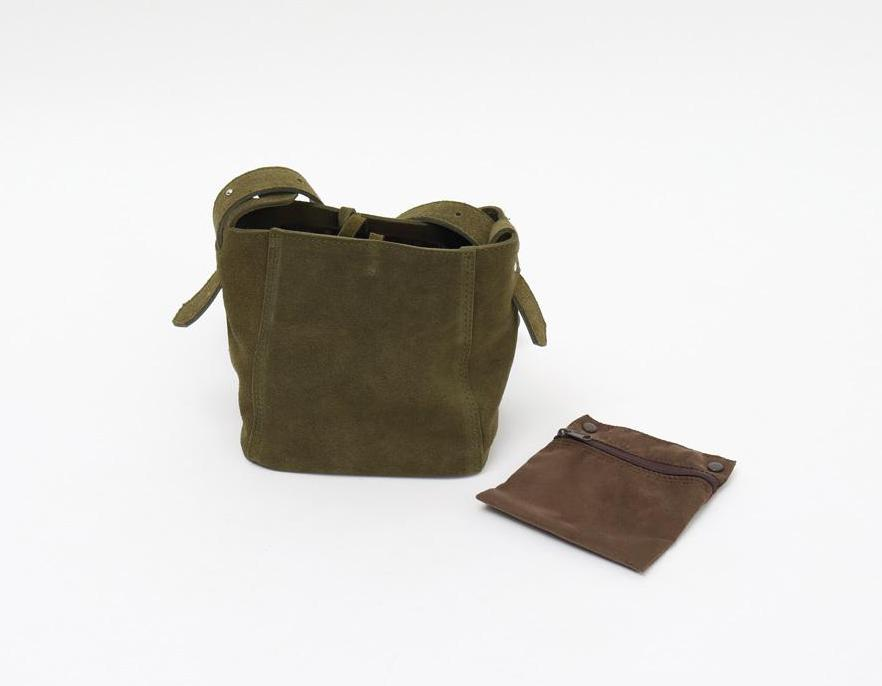

http://www.beginning.kr/shop/shopdetail.html?branduid=1113001&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=aGt3U1g%3D


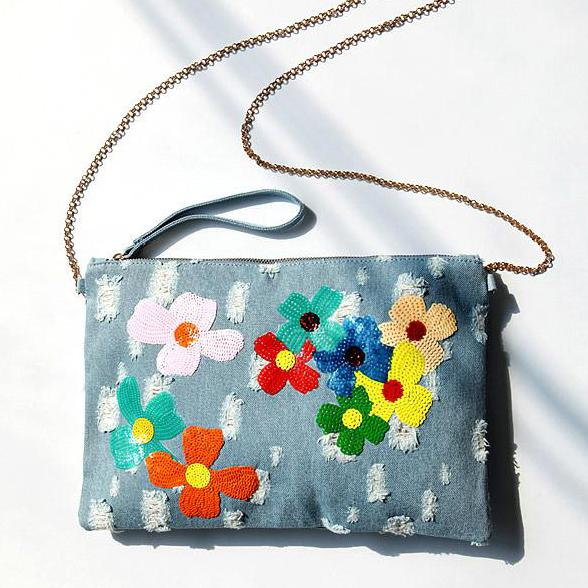

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=624078&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=bmp5W15F


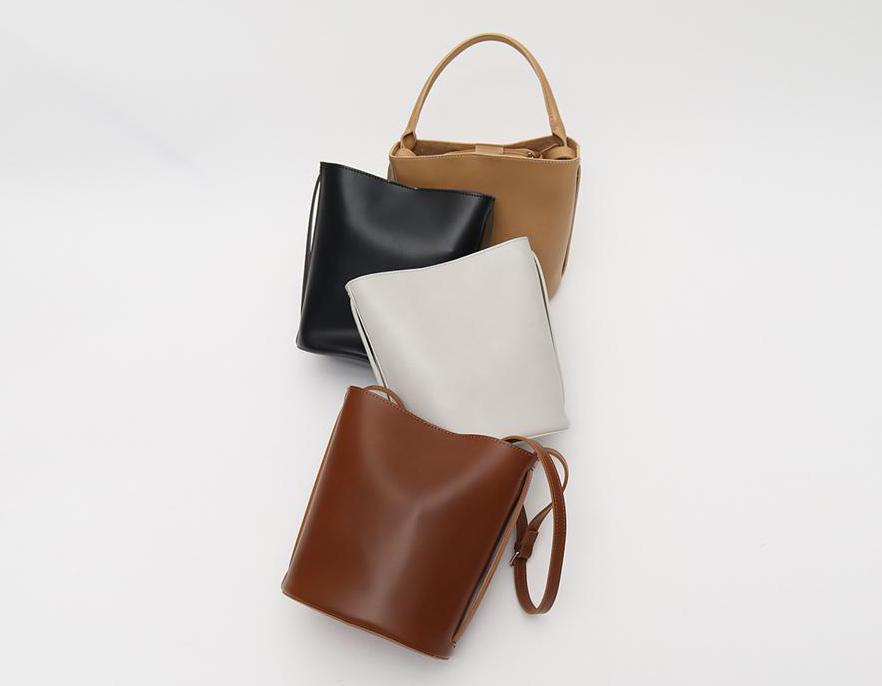

http://www.beginning.kr/shop/shopdetail.html?branduid=1115194&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=bml5W11M


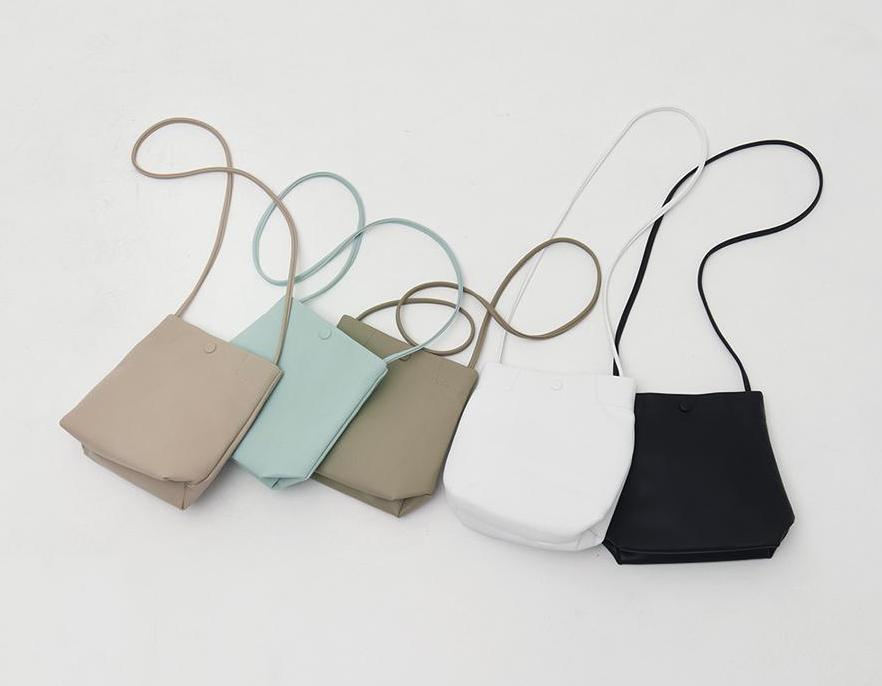

http://www.beginning.kr/shop/shopdetail.html?branduid=1115470&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=bGx3U1w%3D


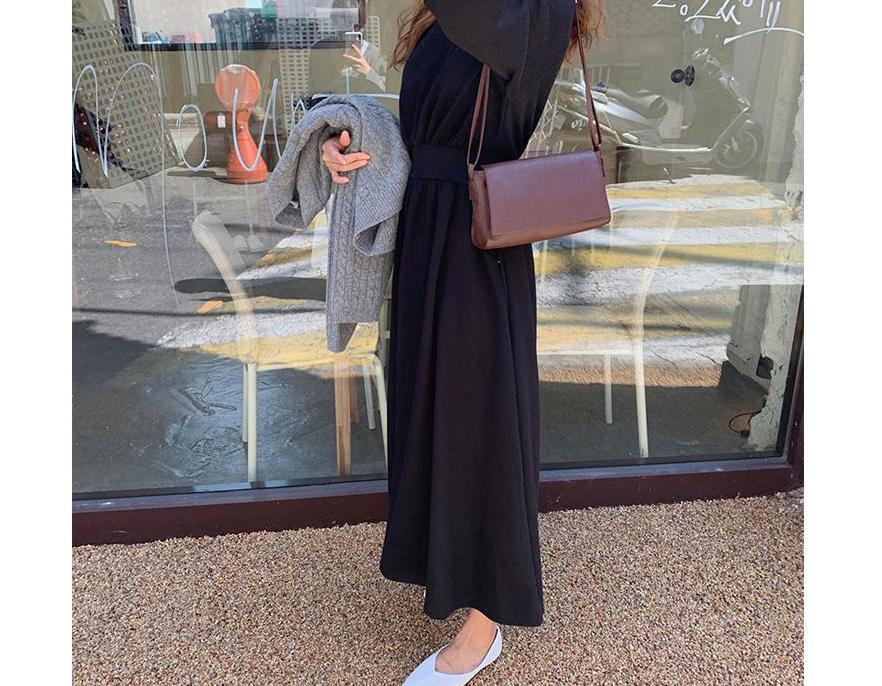

http://www.beginning.kr/shop/shopdetail.html?branduid=1115562&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=amp3UF4%3D


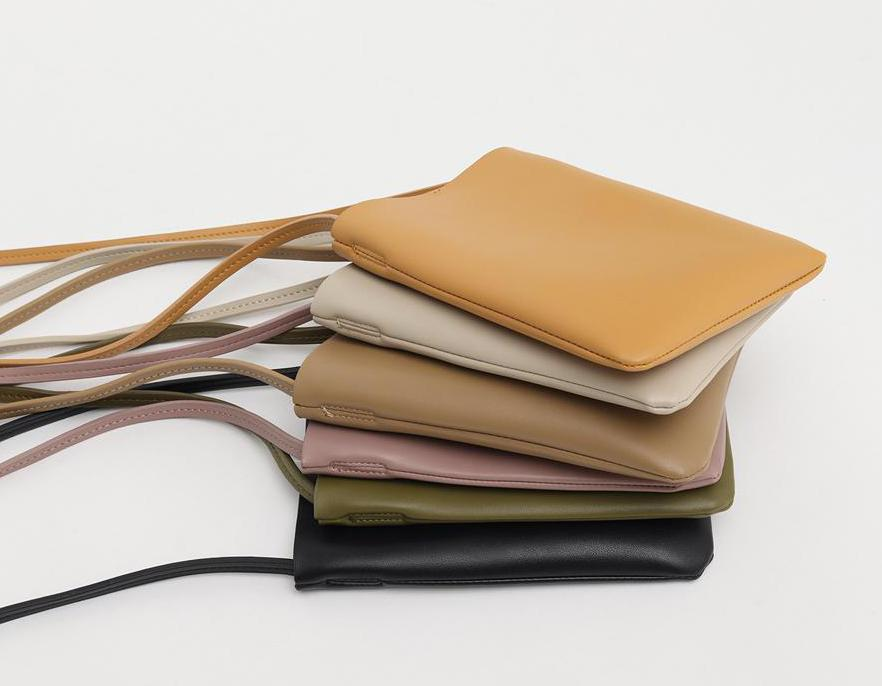

http://www.beginning.kr/shop/shopdetail.html?branduid=1115585&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=bmt5W11C


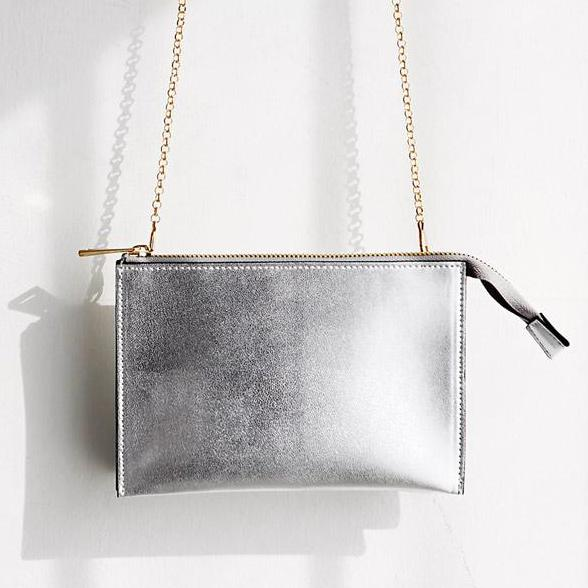

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=622370&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=amt3Ug%3D%3D


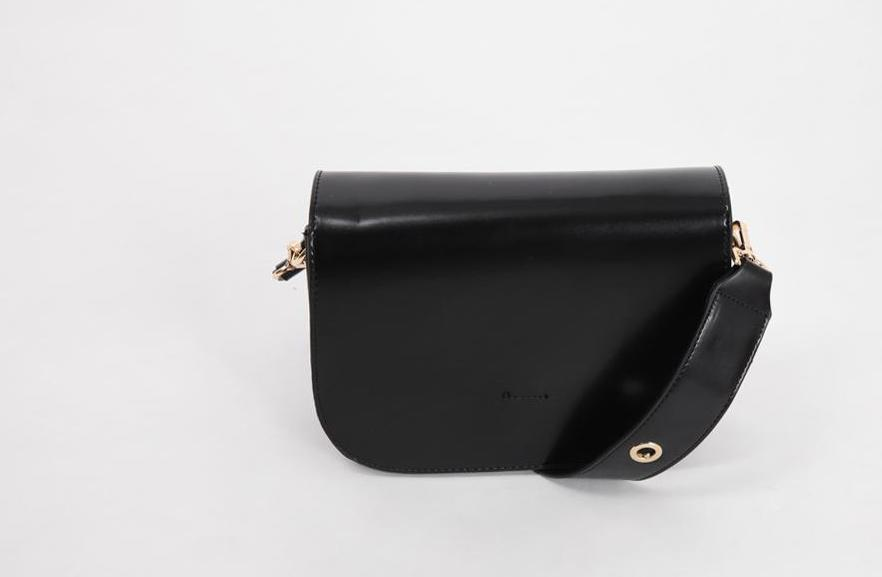

http://www.beginning.kr/shop/shopdetail.html?branduid=1108335&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=bW93VV8%3D


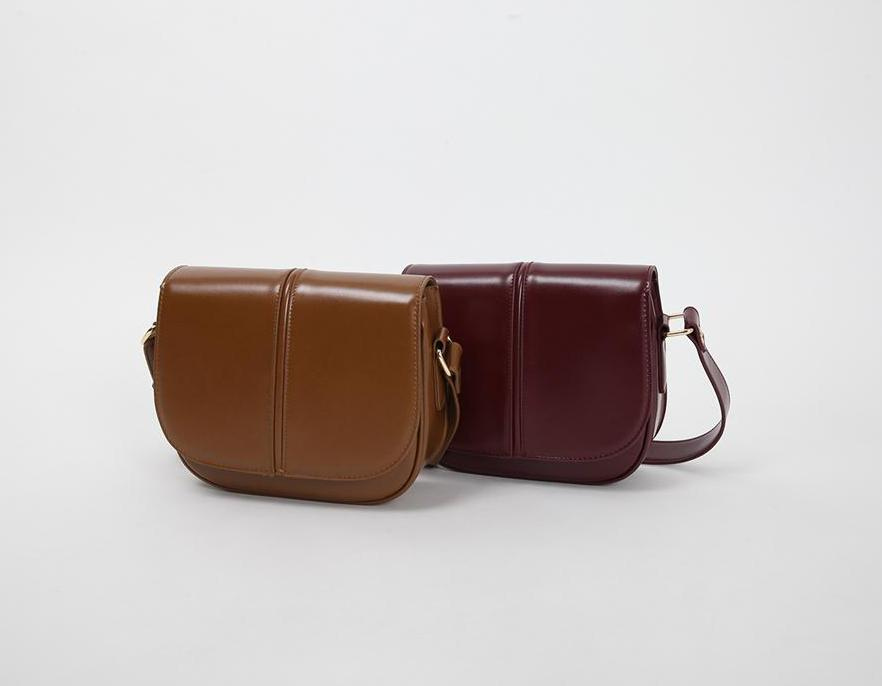

http://www.beginning.kr/shop/shopdetail.html?branduid=1110795&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=aW93U1w%3D


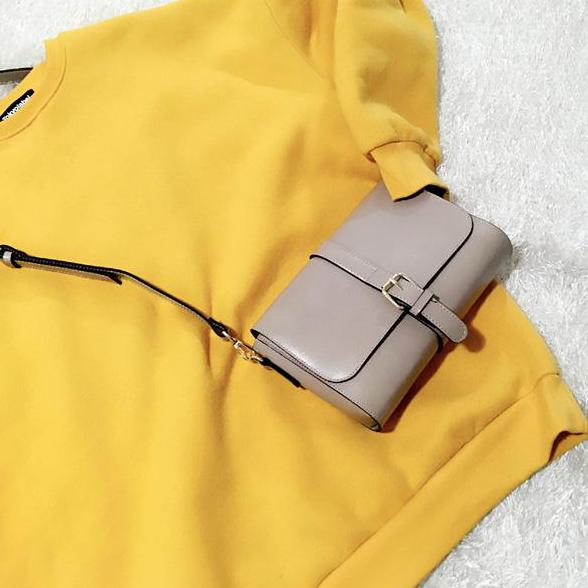

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=621545&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=bm14W1o%3D


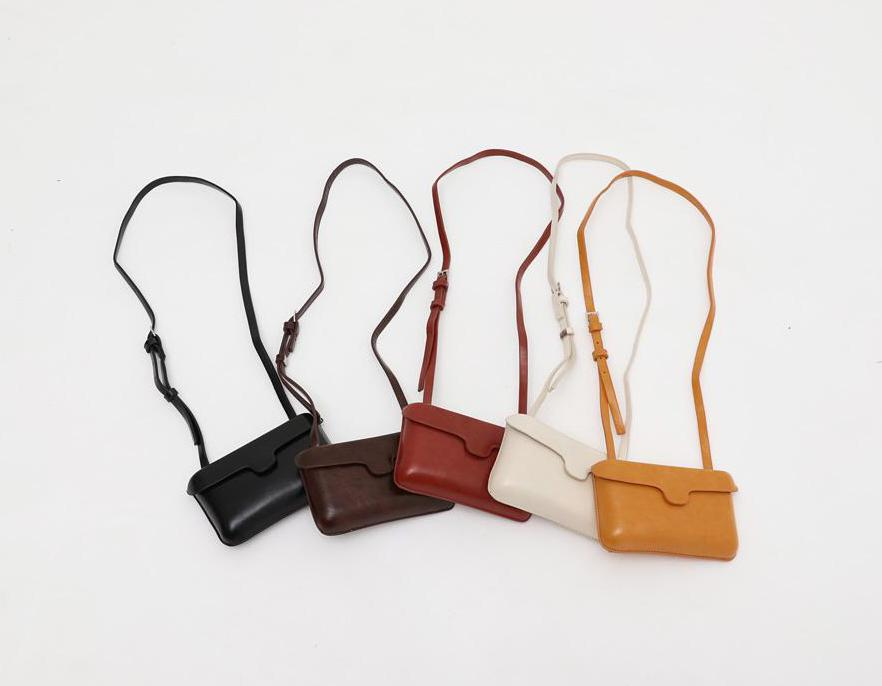

http://www.beginning.kr/shop/shopdetail.html?branduid=1114791&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=bmx5W19D


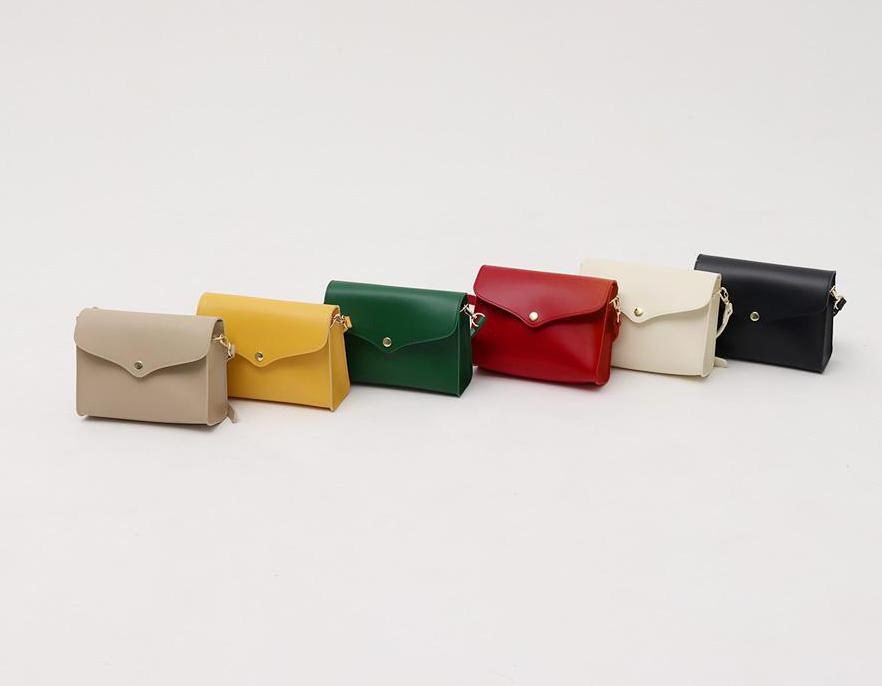

http://www.beginning.kr/shop/shopdetail.html?branduid=1114963&xcode=041&mcode=005&scode=&type=Y&sort=manual&cur_code=041&GfDT=bm17W1hE


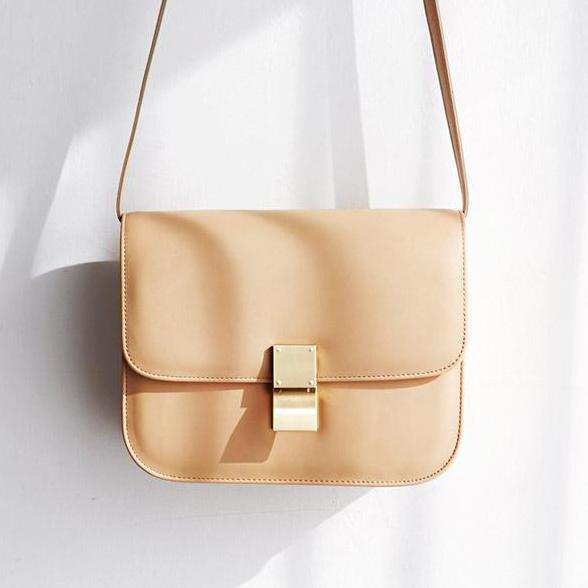

http://www.bagshoes.co.kr/shop/shopdetail.html?branduid=622495&xcode=033&mcode=000&scode=&type=P&sort=order&cur_code=033&GfDT=aml3UA%3D%3D


In [29]:
for ra in r:
    URL = ra.product_image_url
    display(Image(requests.get(URL).content ,height=10))
    print(ra.product_url)

In [100]:
ProductCategories.objects.filter(colors__isnull=True)

<QuerySet []>

In [101]:
a={}

In [102]:
if not a:
    print('--')

--


In [2]:
import requests
from io import BytesIO
from PIL import Image
from django.core.files.images import get_image_dimensions

In [10]:
i=ProductMaster.objects.last().product_image

In [1]:
a={}
b={'null':1}

In [2]:
if a == {}:
    print('--')

--


In [7]:
if 'null' in b:
    print('--')

--


In [5]:
if a=={} or null in b.keys():
    print('--')

--


In [9]:
print(b.keys())

dict_keys(['null'])


In [5]:
ProductMaster.objects.last().tag_category

AttributeError: 'ProductMaster' object has no attribute 'tag_category'